# Assignment WEEK 3

## Covid-19 dataset in South Korea

### Data description

The dataset was part of the Pyladies bootcamp and it was obtained from https://www.kaggle.com/kimjihoo/coronavirusdataset

The dataset contains a total of 12 files, and in this practice I will explore only one file which is called Case.csv and all given cases are reported in different province of South Korea.

This file contain a total of 8 columns, which are: case_id, province, city, group, infection_case, confirmed, latitude, longitude

- Data Analysis
Data is analysed by using different python libraries: pandas, numpy and matplotlib.

Questions on which we will try to answer are: 
 - How many unique cities/provinces does the file contain?
 - How many confirmed cases are in each province?
 - Show a top five provinces with most confirmed cases?
 - How many confirmed cases are in each province taking into account group column?
 

In [2]:
# import pandas and import data set
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('~/Documents/Pylaides/2_Bootcamp-Data-Analysis-beginner-apr-may2020_mine/lessons/Case.csv')
df.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,98,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,20,37.592888,127.056766
2,1000003,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
3,1000004,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
4,1000005,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403


## Explore the dataset

In [3]:
#First we will see the number of rows and columns

df.shape # we have a total of 112 rows and 8 columns

(112, 8)

In [3]:
#Check for the datatypes of the columns in the dataset
df.dtypes

# if we want to check the columns which have a datatype equal to object we use this approach
type(df['province'][0]) # from this we can see that province is string type which is corect 

str

In [47]:
#display a summary of the dataset
df.info() # there is no nulls in the dataset however we should check is there some other issues such as NaN, or other signs that are not useful

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   case_id         112 non-null    int64 
 1   province        112 non-null    object
 2   city            112 non-null    object
 3   group           112 non-null    bool  
 4   infection_case  112 non-null    object
 5   confirmed       112 non-null    int64 
 6   latitude        112 non-null    object
 7   longitude       112 non-null    object
dtypes: bool(1), int64(2), object(5)
memory usage: 6.4+ KB


In [4]:
#display the number of unique values for each column
df.nunique()

case_id           112
province           17
city               34
group               2
infection_case     43
confirmed          52
latitude           41
longitude          41
dtype: int64

In [13]:
#we can also show descriptive statistics for column which have a data type equal to integer
df.confirmed.describe()

count     112.000000
mean       87.446429
std       440.293981
min         0.000000
25%         5.000000
50%        10.000000
75%        33.000000
max      4510.000000
Name: confirmed, dtype: float64

In [17]:
#check for duplicated rows
sum(df.case_id.duplicated())


0

In [24]:
#check for the null values
s = pd.Series([df, np.nan, np.nan])
s.isna().sum()
# it seems that we have a NaN value in city column
print(s)

0         case_id          province           city ...
1                                                  NaN
2                                                  NaN
dtype: object


In [5]:
df.groupby(['city'])['case_id'].count()
# it seems that there are 50ty rows that have a dash sing in it.
#we should check why this is the case and what we can do about it

nocity = df.query('city == "-"')

nocity.head() # it seems that we can't use infection_case column to extract information about city, therefore the city coulumn should not be used for further analysis


,case_id,province,city,group,infection_case,confirmed,latitude,longitude
8,1000009,Seoul,-,False,overseas inflow,313,-,-
9,1000010,Seoul,-,False,contact with patient,18,-,-
10,1000011,Seoul,-,False,etc,23,-,-
17,1100007,Busan,-,False,overseas inflow,21,-,-
18,1100008,Busan,-,False,contact with patient,18,-,-


In [154]:
# Next step is to check province column since the city coulumn is not very useful since there is 
# a total of 45 percent missing information in that column
print(round((50/112)*100,2))

44.64


In [6]:
#there is not any strange character regarding provinces names
df.groupby(['province'])['confirmed'].count().sort_values(ascending=False)

province
Gyeongsangbuk-do     12
Seoul                11
Gyeongsangnam-do     10
Daegu                 9
Gyeonggi-do           9
Busan                 9
Gangwon-do            6
Daejeon               6
Sejong                6
Incheon               5
Jeollanam-do          5
Chungcheongnam-do     5
Chungcheongbuk-do     5
Gwangju               4
Ulsan                 4
Jeju-do               3
Jeollabuk-do          3
Name: confirmed, dtype: int64

## Answers to the given questions

### Question 1

Since we established that we missed a great number of information in city column, I decided to use onlu province column in order to answer on the given questions.

In [158]:
n_province = df.province.nunique()

print('There is a total of', n_province, 'provinces in dataset.')

There is a total of 17 provinces in dataset.


### Question 2

Number of confirmed cases in each province.

In [153]:
province_info = (df.groupby(['province'])['confirmed'].sum().sort_values(ascending=False))
province_info

province
Daegu                6634
Gyeongsangbuk-do     1310
Seoul                 565
Gyeonggi-do           539
Busan                 137
Chungcheongnam-do     135
Gyeongsangnam-do      115
Incheon                78
Gangwon-do             51
Sejong                 46
Ulsan                  42
Chungcheongbuk-do      38
Daejeon                33
Gwangju                30
Jeollabuk-do           14
Jeollanam-do           14
Jeju-do                13
Name: confirmed, dtype: int64

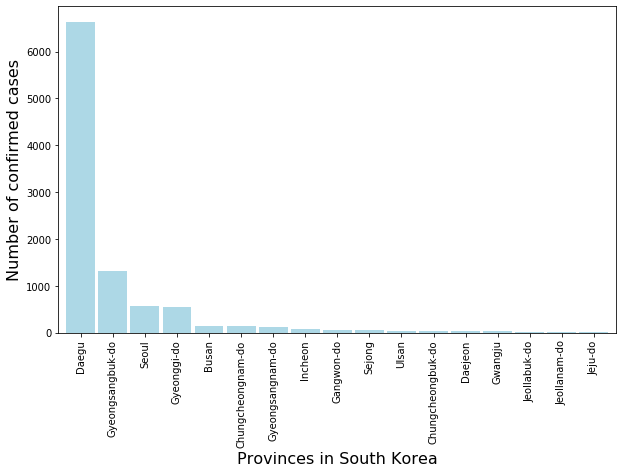

In [161]:
# create plot 
province = df.groupby(['province']).sum()['confirmed'].sort_values(ascending=False).plot(kind='bar', width=0.9, color='lightblue', figsize = (10,6))
province.set_xlabel("Provinces in South Korea", fontsize=16)
province.set_ylabel("Number of confirmed cases", fontsize=16)
plt.show ()

### Question 3

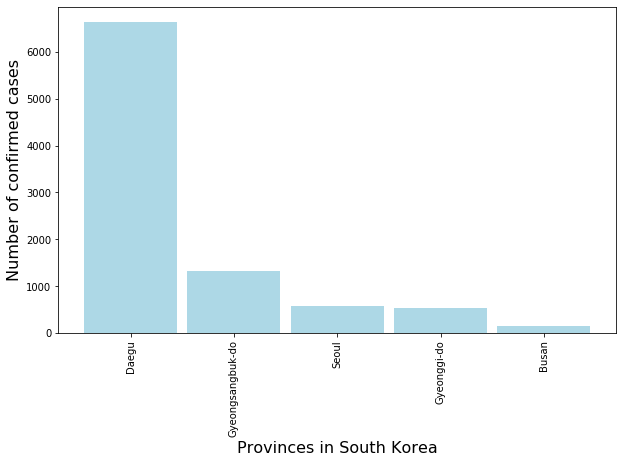

In [162]:
# top 5 provinces by number of confirmed cases
province = df.groupby(['province']).sum()['confirmed'].sort_values(ascending=False).head(5).plot(kind='bar', width=0.9, color='lightblue', figsize = (10,6))
province.set_xlabel("Provinces in South Korea", fontsize=16)
province.set_ylabel("Number of confirmed cases", fontsize=16)
plt.show ()

### Question 4

The meaning of group column is definded on Kagle webpage as:
- Group: TRUE: group infection / FALSE: not group
   -    If the value is 'TRUE' in this column, the value of 'infection_cases' means the name of group.
   -  The values named 'contact with patient', 'overseas inflow' and 'etc' are not group infection.

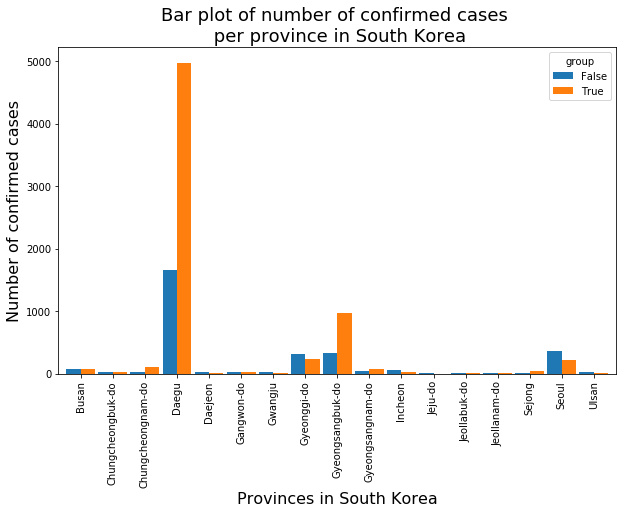

In [26]:
# plot
group = df.groupby(['group', 'province'])['confirmed'].sum().sort_values()
group_plot = group.unstack(0).plot.bar(width=0.9, figsize = (10,6))
group_plot.set_xlabel("Provinces in South Korea", fontsize=16)
group_plot.set_ylabel("Number of confirmed cases", fontsize=16)
group_plot.set_title('Bar plot of number of confirmed cases \n per province in South Korea', fontsize= 18)
plt.show();